# Objective
### Statistical Analysis of Business Data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected to do the following:

* Explore the dataset and extract insights using Exploratory Data Analysis.
* Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?
* Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
* Is the proportion of smokers significantly different across different regions?
* Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.
 ( Consider a significance level of 0.05 for all tests.)

### Data Dictionary –

* Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
* Sex - This is the policy holder's gender, either male or female.
* BMI - This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
* Children - This is an integer indicating the number of children / dependents covered by the insurance plan.
* Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.
* Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
* Charges - Individual medical costs billed to health insurance

## Q.1 - Exploratory Data Analysis
##### Step 1: Importing the necessary libraries

In [97]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA

import warnings
warnings.filterwarnings('ignore') #to avoid warnings

#### Step 2: Read the data

In [7]:
mydata = pd.read_csv('AxisInsurance.csv')

In [8]:
mydata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
# create a copy of data to avoid changes in the original data
df_insurance = mydata.copy()

#### Step 3: Perform EDA on the Axis Insurance dataset

In [14]:
# Shape of dataset
df_insurance.shape

(1338, 7)

This dataset has 1338 rows and 7 columns

In [13]:
# Info about the dataset
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


This dataset has 1338 instances with 7 attributes with no null values.
* There are 4 numerical variables and 3 categorical variables (object type).
* We will need to convert the object types later for the pairplots to see the correlation.

In [15]:
# check the missing values
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no missing or null value in the dataset.

In [17]:
# Five point summary for the datasest
df_insurance.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338,NaN,NaN,NaN,39.207,14.05,18,27,39,51,64
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338,NaN,NaN,NaN,30.6634,6.09819,15.96,26.2963,30.4,34.6938,53.13
children,1338,NaN,NaN,NaN,1.09492,1.20549,0,0,1,2,5
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338,NaN,NaN,NaN,13270.4,12110,1121.87,4740.29,9382.03,16639.9,63770.4


* Age : The average age in the data is 39 years, implying a representation of adult population.
* BMI : Majority of people have comparatively higher BMI > 24.9 indicating an over-weight population.
* Children : 75% of people have 2 or less children
* Sex: There are more Males than Females in this dataset.
* Smoker : Non-smokers are more in number than smokers.
* Region : Company has most customers from Southeast region of US.
* Charges : Charges data is highly skewed with only few people claiming higher amounts.

#### 3a. Univariate analysis

#### Numeric variables

In [57]:
# ******  Referring from Uber case study from EDA module  *********
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
def hist_box(mycol):
    f, (ax_box, ax_hist) = plt.subplots(nrows=2, sharex=True, gridspec_kw = {"height_ratios": (.25, .75)})
    
    sns.boxplot(mycol, ax=ax_box, showmeans=True, color='red')
    sns.distplot(mycol, kde=True, ax=ax_hist )
    ax_hist.axvline(np.mean(mycol), color='g', linestyle='--') # Add mean to the histogram
    ax_hist.axvline(np.median(mycol), color='black', linestyle='-') # Add median to the histogram

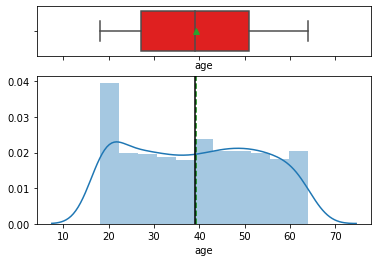

In [56]:
hist_box(df_insurance.age)

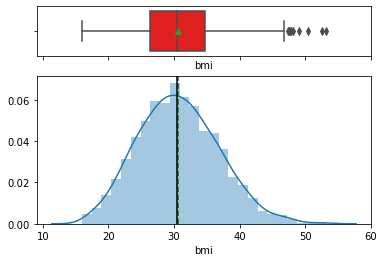

In [58]:
hist_box(df_insurance.bmi)

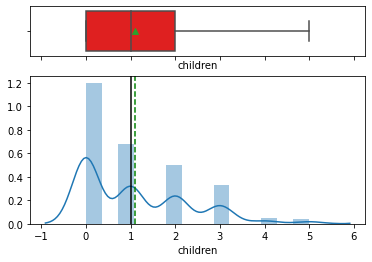

In [59]:
hist_box(df_insurance.children)

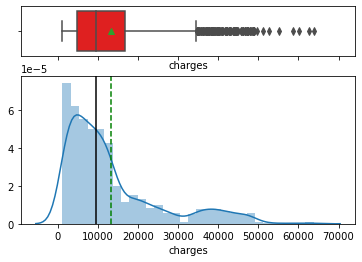

In [60]:
hist_box(df_insurance.charges)

##### Observations
* Age : Age looks to be distributed uniformly with no outliers.
* BMI : BMI looks normally distributed, but with few outliers with higher BMIs. Also, there are very less people with lower BMI range < 18. So, we are looking at a dataset of mostly over-weighted people.
* Children : Children is right skewed indicating that only few people have more than 2 children. Majoirty of people do not have children.
* Charges : Charges is hihgly skewed with lots of outliers. 75% of people have bille dcharges less than 17000.

#### Categorical variables
 NOTE : We will be including the variable "Children", as it has few defined unique values and so its better to treat it as a categorical variable.

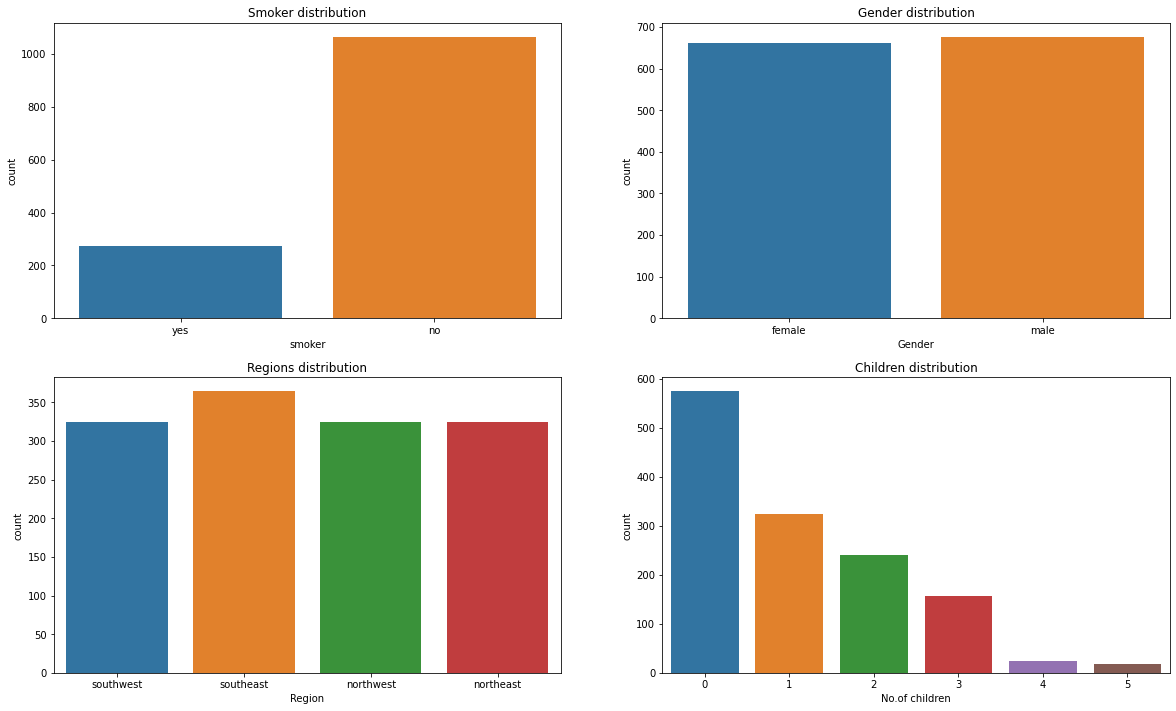

In [64]:
# Using subplots to plot all the categorical variables 
plt.figure(figsize=(20,25))

plt.subplot(4,2,1)
sns.countplot(df_insurance['smoker'])
plt.title('Smoker distribution')

plt.subplot(4,2,2)
sns.countplot(df_insurance['sex'])
plt.xlabel('Gender')
plt.title('Gender distribution')

plt.subplot(4,2,3)
sns.countplot(df_insurance['region'])
plt.xlabel('Region')
plt.title('Regions distribution')

plt.subplot(4,2,4)
sns.countplot(df_insurance['children'])
plt.xlabel('No.of children')
plt.title('Children distribution')

plt.show()

#### Observations
* Smoker: There are lot more non-smokers than smokers.
* Gender: There is not much difference in males & females.
* Region: Almost equal amount of people from all the regions have participated, with a slight more from Southeast region.
* Children: Majorty of people have less than 2 children and very few have more than 3. Also, people with no children are highest in count.

#### 3b. Multivariate analysis

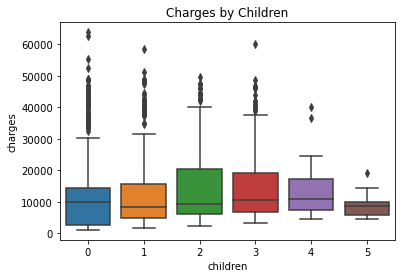

In [140]:
# Analysing relation between children count & claim amount
sns.boxplot(x='children', y='charges', data=df_insurance)
plt.title('Charges by Children')
plt.show()

People with no children have billed high charges whereas people with 5 children have billed the least charges.

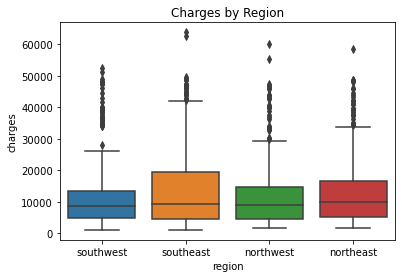

In [141]:
# Analysing distributing of charges as per the regions
sns.boxplot(x='region', y='charges', data=df_insurance)
plt.title('Charges by Region')
plt.show()

There are outliers in every location, however, Southeast customers have billed higher charges compared to other regions.

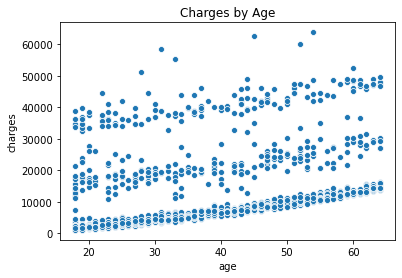

In [148]:
# Analysing distributing of charges by age
sns.scatterplot(x='age', y='charges', data=df_insurance)
plt.title('Charges by Age')
plt.show()

 There is a noticebale pattern between "age" and "charges". Older people have charges higher than younger ones.

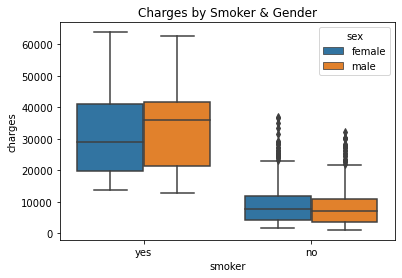

In [142]:
# analysing charges by sex and smoker
sns.boxplot(x='smoker', y='charges', data=df_insurance, hue=df_insurance['sex'])
plt.title('Charges by Smoker & Gender')
plt.show()

* Smokers have claimed high bill amount than the non-smokers. However, we can see few outliers in non-smokers charging higher amount.
* Also, gender is not a differentiating factor for smoking habit.

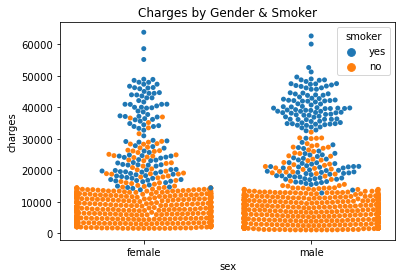

In [143]:
sns.swarmplot(x='sex', y='charges', data=df_insurance, hue='smoker')
plt.title('Charges by Gender & Smoker')
plt.show()

Clearly, there are more male smokers with higher charges than female smokers, whereas charges for males & females who do not smoke, look uniformly distributed.

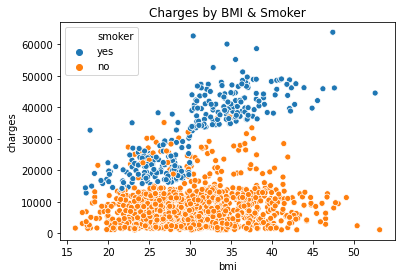

In [144]:
#Analysing charges by BMI & smoker
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df_insurance)
plt.title('Charges by BMI & Smoker')
plt.show()

Smokers with BMI > 30, tend to incur hihger charges above 30000, whereas, non-smoker even with BMI > 30 have incurred charges below 30000.

#### Pairplot to include all the columns of dataset.

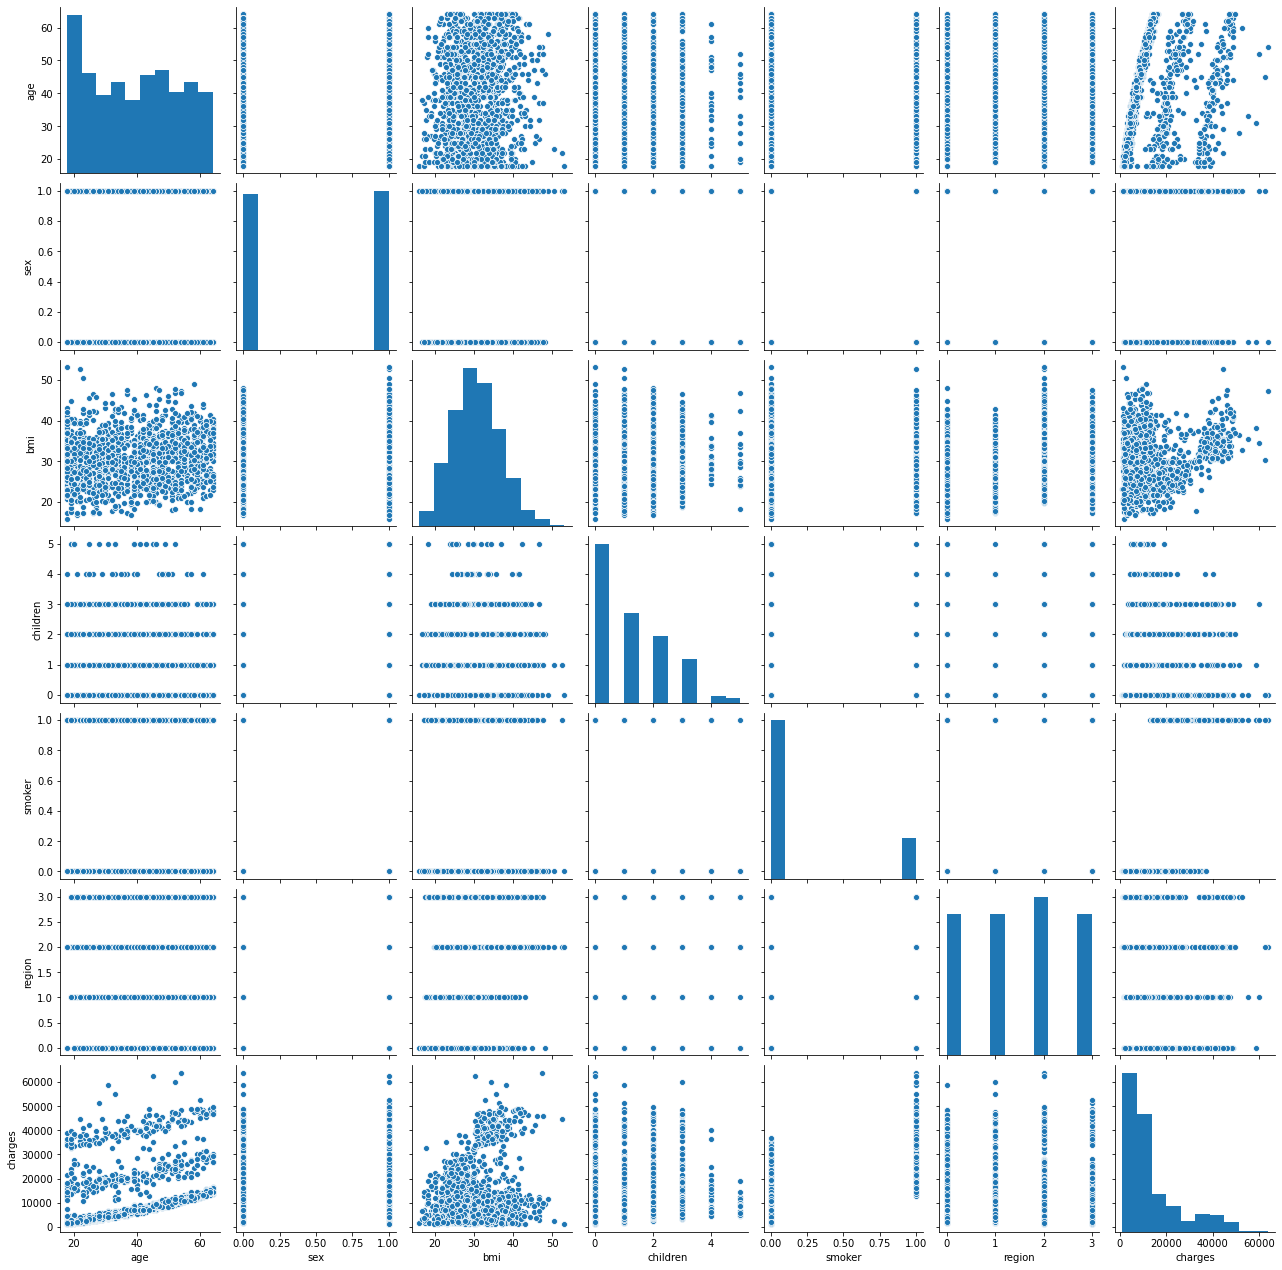

In [79]:
#Perform Label encoding on the categorical variables so that they canbe included in pairplot to 
#analyse the correltaion with other numerical variables
# Reference from google (https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn)
df_insurance_encode = df_insurance.copy()
df_insurance_encode.loc[:,['sex','smoker','region']] = df_insurance.loc[:,['sex','smoker','region']].apply(LabelEncoder().fit_transform)

#pairplot for all the variables
sns.pairplot(df_insurance_encode)
plt.show()

**Observations**
* There is no indication of realtionship between "age" and "bmi".
* There is a noticebale pattern between "age" and "charges". Older people have charges higher than younger ones.
* There is a slight postive realtion between "bmi" and "charges".
* Charges decrease with increase in number of children.

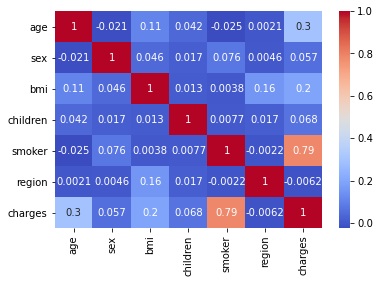

In [149]:
sns.heatmap(df_insurance_encode.corr(), annot=True, cmap='coolwarm')
plt.show()

There is no correlation between the variables, except for smoker and charges that have a positive correlation.

## Q.2 - Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?

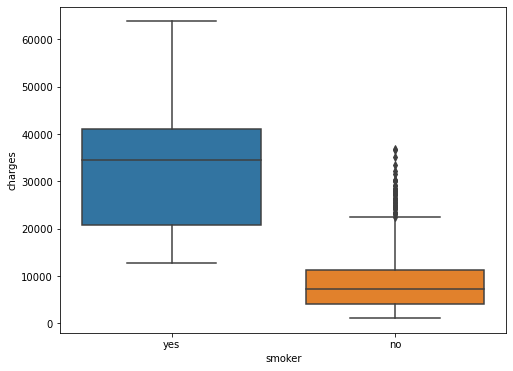

In [83]:
# visualization for relationship between smokers/non-smokers and charges
plt.figure(figsize=(8,6))
sns.boxplot(x='smoker', y='charges', data=df_insurance)
plt.show()

#### Formulating the null & alternate hypothesis

* Null Hypothesis, Ho : There is no difference between medical claims made by smokers and by non-smokers.
* Alternate Hypothesis, Ha : There is a difference between medical claims made by smokers and by non-smokers.

In [87]:
# This is independent T-test to check dependency of smoking on charges

# creating array for charges against smokers
x1=np.array(df_insurance[df_insurance.smoker == 'yes'].charges)

# creating array for charges against non-smokers
x2=np.array(df_insurance[df_insurance.smoker == 'no'].charges)

# independent t-test
t, p_value = stats.ttest_ind(x2, x1)
print("p_value :", p_value)

p_value : 8.271435842177219e-283


Since, p_value < 0.05 (alpha), we reject the null hypothesis and conclude that there is a significant difference between medical claims made by smokers and by non-smokers. Smokers pay higher charges compared to non-smokers.

## Q.3 - Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

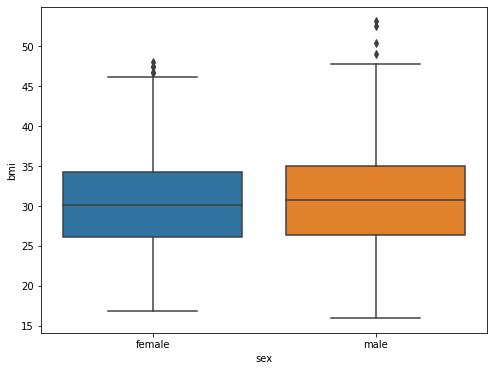

In [89]:
# visualization for relationship between bmi and sex
plt.figure(figsize=(8,6))
sns.boxplot(x='sex', y='bmi', data=df_insurance)
plt.show()

It is not much clear from the visualization whether or not there is a difference between BMI of females and males.

#### Formulating the null & alternate hypothesis

* Null Hypothesis, Ho : There is no difference between BMI of females and males.
* Alternate Hypothesis, Ha : There is a difference between BMI of females and males.

In [91]:
# creating an array for BMI of males
x1 = np.array(df_insurance[df_insurance.sex == 'male'].bmi)

# creating an array for BMI of females
x2 = np.array(df_insurance[df_insurance.sex == 'female'].bmi)

# independent t-test
t, p_value = stats.ttest_ind(x2, x1)
print("p_value :", p_value)

p_value : 0.08997637178984932


Since, p_value > 0.05 (alpha), we "Fail to reject" the null hypothesis and conclude that there is no difference between BMIs of females and BMIs of males.

## Q.4 - Is the proportion of smokers significantly different across different regions?

#### Formulating the null & alternate hypothesis

* Null Hypothesis, Ho : There is no difference in proportion of smokers across different regions.
* Alternate Hypothesis, Ha : There is a difference in proportion of smokers across different regions.

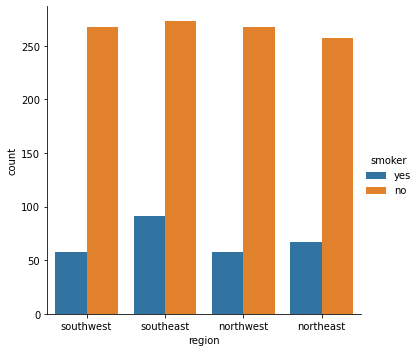

In [160]:
sns.catplot(x='region', hue='smoker', data=df_insurance, kind='count')
plt.show()

In [163]:
# prepare contingency table for smoker and region attributes
crosstab = pd.crosstab(df_insurance['smoker'], df_insurance['region'])
print(crosstab)

# performing chi_square test
chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

print("\np_value =", p_value)

region  northeast  northwest  southeast  southwest
smoker                                            
no            257        267        273        267
yes            67         58         91         58

p_value = 0.06171954839170547


Since p_value (0.062) > 0.05, we "Fail to reject" the null hypothesis and conclude that there is no difference in proportion of smokers across different regions.

## Q.5 - Is the mean BMI of women with no children, one child, and two children the same?

#### Formulating the null & alternate hypothesis

* Null Hypothesis, Ho : Mean BMI of women with no children, 1 child and two children are the same.
* Alternate Hypothesis, Ha : Mean BMI of women with no children, 1 child and two children are not the same.

In [153]:
# Let's create a dataframe only for females who have no children, 1 child and 2 children only.

no_of_children = [0,1,2] # creating a list for 0, 1 & 2 values for no.of children

# creating dataframe for people with no children, 1 child and 2 children
df_child = df_insurance[df_insurance['children'].isin(no_of_children)]

# creating dataframe for only females with no children, 1 child and 2 children
df_female = df_child[df_child['sex'] == 'female']

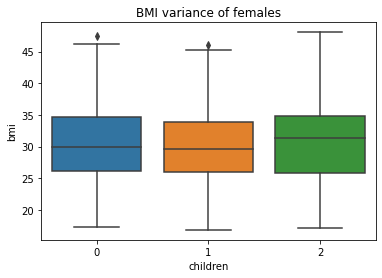

In [155]:
sns.boxplot(x='children', y='bmi', data=df_female)
plt.title('BMI variance of females')
plt.show()

In [162]:
# Performing one-way ANOVA test

formula = 'bmi ~ C(children)'
model = ols(formula, df_female).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq    mean_sq         F    PR(>F)
C(children)    2.0     24.590123  12.295062  0.334472  0.715858
Residual     563.0  20695.661583  36.759612       NaN       NaN


Considering both factors(bmi & children) and since the p_value (0.715858) > 0.05, we "Fail to reject" the null hypothesis and conclude that the mean BMI of women with no children, 1 child and two children are the same.